In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import tensorflow_io as tfio
import matplotlib.pyplot as plt

In [2]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [5]:
bb = load_wav_16k_mono('./audio_data/metal_wav/back in black.wav')

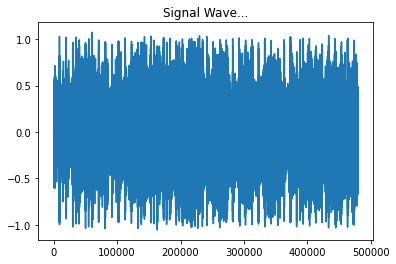

In [6]:
plt.title("Signal Wave...")
plt.plot(bb)
plt.show()

In [21]:
ghost_wav

<tf.Tensor: shape=(480000,), dtype=float32, numpy=
array([-1.60915954e-06,  4.40381382e-06,  1.21946755e-08, ...,
       -2.30672151e-01, -2.42171437e-01, -2.19913483e-01], dtype=float32)>

In [8]:
def preprocess(file_path): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [9]:
bb_spectrum = preprocess('./audio_data/metal_wav/back in black.wav')
# baby_one_more_time_spectrogram = preprocess('./random/baby_one_more_time.wav')

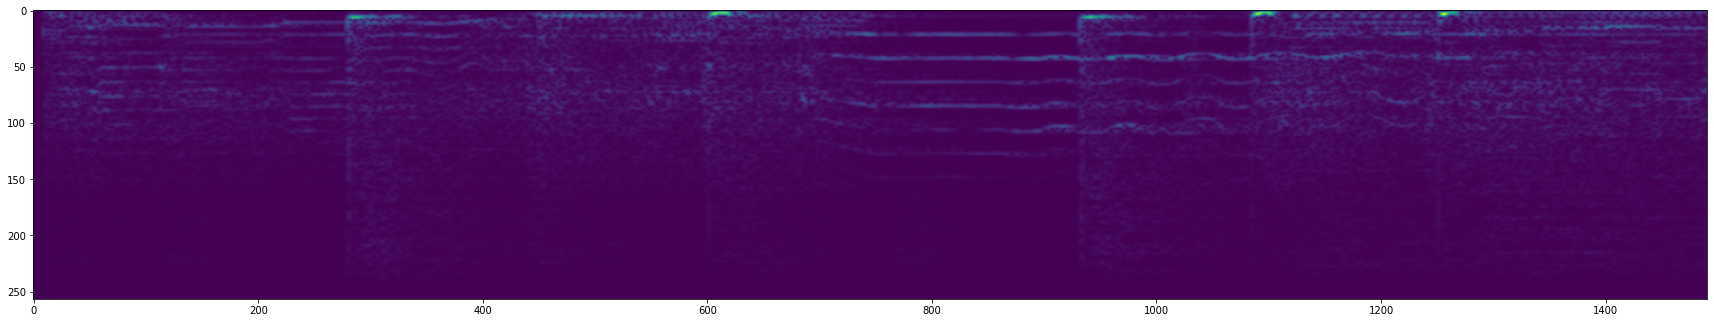

In [10]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(bb_spectrum)[0])
plt.show()